# CH05. 데이터 이해하기

## SECTION 01. 지표로 데이터 탐색하기 

데이터 분석 (EDA, Exploratory Data Analysis)

- `일변량 분석`: 변수(Variable) 를 기준으로 1개의 변수만 분석
- `다변량 분석`: 2개 이상의 변수 간의 관계를 분석

요약 통계표 생성 describe
- `count` 해당 컬럼에서 유효한 데이터 수
- `mean` 평균값
- `std` 표준편차
- `min` 최솟값
- `25%` 제 1사분위수
- `50%` 제 2사분위수, 중앙값
- `75%` 제 3사분위수
- `max` 최댓값
- `unique` 해당 컬럼에서 고유한 데이터(distinct)의 수, 범주의 수
- `top` 최빈값
- `freq` 해당 컬럼에서 최빈값이 존재하는 개수

In [2]:
# 실습 데이터 가져오기
import pandas as pd
df = pd.read_csv('./dataset/Clean_Dataset.csv')

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
# 지정 인덱스인 첫번째 컬럼 삭제
df.drop([df.columns[0]], axis=1, inplace=True)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [6]:
df.describe(include='all') #문자형/범주형 데이터에 대한 요약 통계량 확인

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


빈도표 확인 `value_counts()`
- 각 컬럼의 빈도를 확인할 수 있음

In [7]:
print(df["airline"].value_counts()) 

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64


In [9]:
print(df["days_left"].value_counts()) 

days_left
25    6633
18    6602
39    6593
32    6585
26    6573
24    6542
19    6537
31    6534
33    6532
40    6531
41    6525
28    6522
38    6512
20    6502
30    6501
42    6497
22    6494
36    6490
21    6479
37    6476
43    6472
44    6436
17    6419
11    6417
34    6412
13    6404
23    6401
29    6397
12    6381
27    6360
14    6349
15    6340
45    6314
35    6291
16    6272
46    6160
49    6154
48    6078
47    6069
10    5822
8     5767
6     5740
7     5703
9     5665
5     5392
4     5077
3     4248
2     4026
1     1927
Name: count, dtype: int64


상관계수 확인하기 `corr()`
- 수치형 데이터의 상관관계
- `상관계수` 두 변수 간의 선형의 상관 관계를 계량화한 수치 -1~ +1 사이의 값을 가짐
- `-1` 음의 상관관계
- `0` 상관관계 없음
- `+1` 양의 상관관계

In [8]:
numeric_df = df.select_dtypes(include=['int', 'float']) # 수치형 데이터로 제한
numeric_df.corr()

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [9]:
df_eco = df[(df['class']=='Economy')] # 데이터를 Class=Economy에 한정
df_eco= df_eco.select_dtypes(include=['int', 'float']) # 수치형 데이터로 제한
df_eco.corr()

,duration,days_left,price
duration,1.000000,-0.042537,0.288379
days_left,-0.042537,1.000000,-0.559551
price,0.288379,-0.559551,1.000000


교차표 확인하기 `crosstab()`
- 두 범주형 데이터의 상관관계

In [10]:
pd.crosstab(df['source_city'], df['departure_time'])

departure_time,Afternoon,Early_Morning,Evening,Late_Night,Morning,Night
source_city,,,,,,
Bangalore,5183,13611,14243,457,12323,6244
Chennai,5807,9319,5402,72,10550,7550
Delhi,11234,12248,16790,357,13679,7035
Hyderabad,7221,8524,5991,38,9923,9109
Kolkata,7863,8133,9594,114,12065,8578
Mumbai,10486,14955,13082,268,12606,9499


## SECTION 02. 시각화로 데이터 탐색하기

파이썬 시각화 라이브러리
- `matplotlib` 선 그래프(line), 막대 그래프(bar), 파이 그래프(pie), 히스토그램(histogram), 상자 그래프(box), 산점도(scatter) 등 다양한 시각화 방법을 지원
- `seaborn` matplotlib를 기반으로 만들어진 라이브러리, 다양한 색상과 통계 기능을 제공

선 그래프(line plot)
- 시간이나 순서에 따른 데이터의 연속적인 변화량을 관찰할 때 주로 사용되는 그래프
- 증가와 감소에 대한 상태 변화
- 시간에 따른 기온 변화, 환율 변동, 전염병 환자 발생 추이 등

In [11]:
numeric_df = df.select_dtypes(exclude=['object'])  # 숫자형 컬럼만 선택
days_left_mean = numeric_df.groupby('days_left').mean() #days_left 별 평균

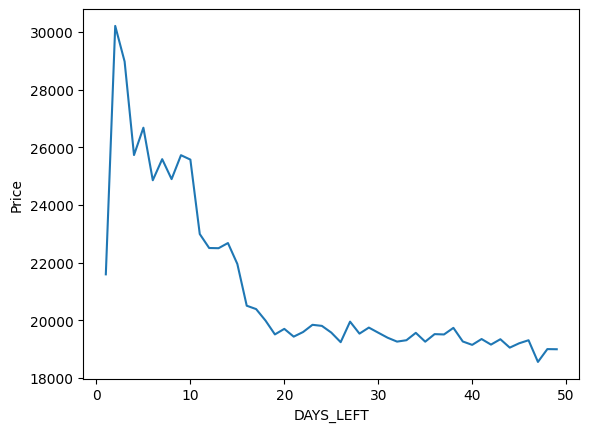

In [12]:
import matplotlib.pyplot as plt # 시각화 라이브러리 불러오기

plt.figure() # 시각화 영역 지정
plt.plot(days_left_mean['price']) #price 데이터로 선 그래프 그리기
plt.xlabel("DAYS_LEFT") # x축 이름
plt.ylabel("Price") # y축 이름
plt.show() #시각화 표기

막대그래프(bar plot)
- 범주에 대한 통계 데이터나 양을 막대 모양으로 나타내는 그래프
- 수량을 한눈에 파악하기 쉽고, 크고 작음을 비교할 수 있음

In [13]:
airline = df.groupby(['airline']) #airline 별 평균 데이터 만들기
airline_mean = airline[['duration', 'days_left', 'price']].mean()
label = airline_mean.index #인덱스를 리스트로 만들기

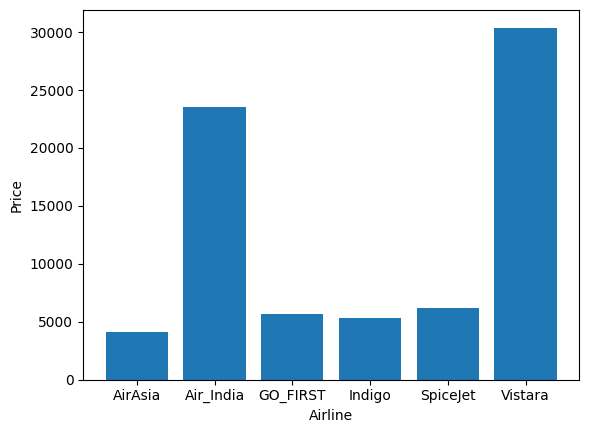

In [14]:
plt.figure()

#인덱스를 x축, 평균가격을 Y축으로 하는 막대 그래프 그리기
plt.bar(label, airline_mean['price'])
plt.xlabel("Airline")
plt.ylabel("Price")
plt.show()

파이 그래프(pie chart)
- 전체에 대한 각 부분의 비율을 부채꼴 모양으로 나타낸 그래프
- 점유율, 투표율, 구성 비율

In [15]:
#departure_time 빈도표 데이터 만들기
departure_time = df['departure_time'].value_counts()

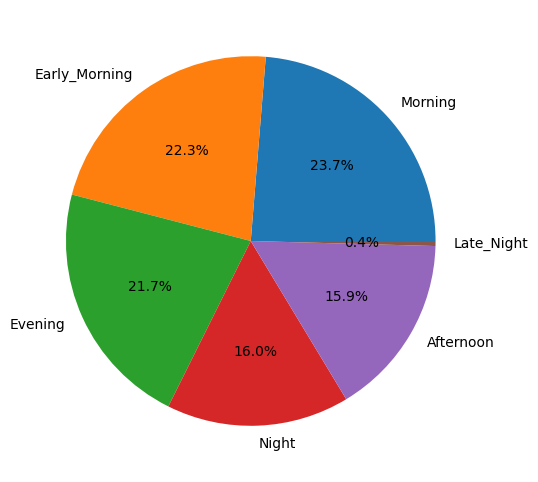

In [16]:
plt.figure(figsize=(10,6)) #figsize => 그래프 크기를 조절

# 파이 그래프 그리기
plt.pie(departure_time, labels=departure_time.index, autopct='%.1f%%')
plt.show()

히스토그램(histogram)
- 특정 데이터의 빈도수를 막대 모양으로 표시한 그래프
- 가로축에는 계급, 세로축에는 도수를 지정
- 데이터의 특성과 분포를 파악하는 역할을 하며 빈도, 빈도밀도, 확율 등의 분포를 그릴 때 사용

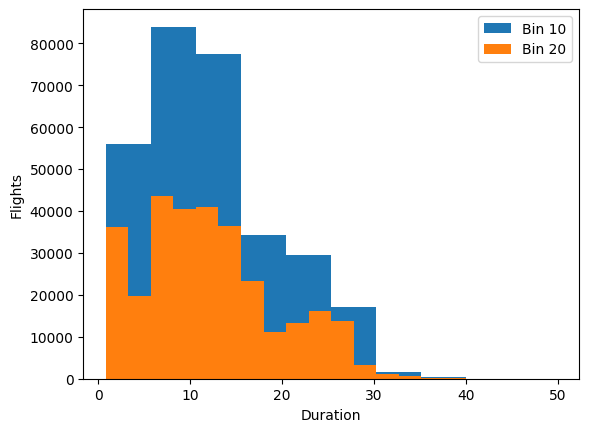

In [17]:
plt.figure()

# duration을 10개 구간으로 나눠 히스토그램 그리기 
plt.hist(df['duration'], bins=10)
# duration을 20개 구간으로 나눠 히스토그램 그리기 
plt.hist(df['duration'], bins=20)

plt.xlabel("Duration")
plt.ylabel("Flights")
plt.legend(("Bin 10", "Bin 20"))
plt.show()

상자 그래프(box plot)
- 사분위수를 중심으로 수치적 요약 통계 자료를 시각화하는 그래프
- 수치 자료로 얻어낸 통계량인 5가지(최솟값, 제 1사분위수, 중앙값, 제3사분위수, 최댓값)을 가지고 그래프를 만들어 데이터를 이해
- `최솟값` 제 1사분위수 -1.5*IQR
- `최댓값` 제 3사분위수 +1.5*IQR
- `IQR` 제 3사분위수 -제1사분위수

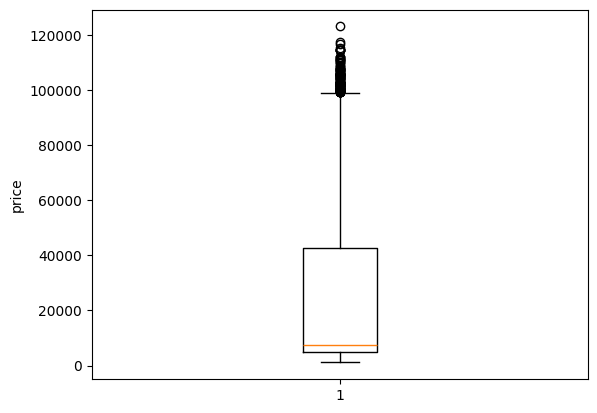

In [18]:
plt.figure()
plt.boxplot(list(df['price']))
plt.ylabel("price")
plt.show()

<Axes: title={'center': 'price'}, xlabel='departure_time'>

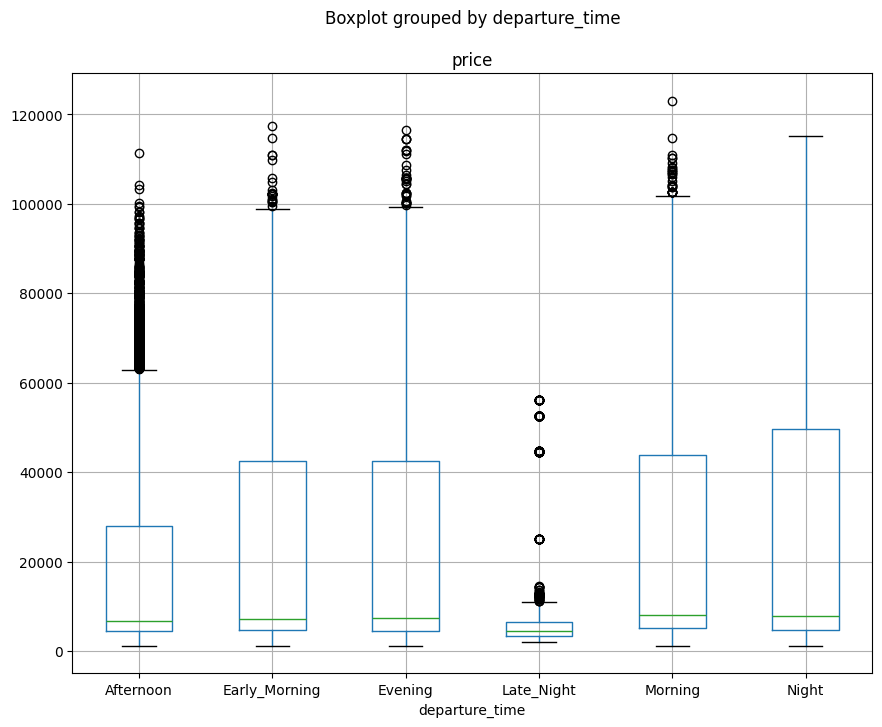

In [19]:
# 출발 시간별 가격 정보의 분포
df.boxplot(by="departure_time", column="price", figsize=(10,8)) #figsize 가로를 10, 세로를 8로 설정

산점도(scatter plot)
- 2개의 연속형 변수의 관계를 보기 위해 좌표의 X축과 Y축에 표시하는 점들을 찍어서 만드는 그래프

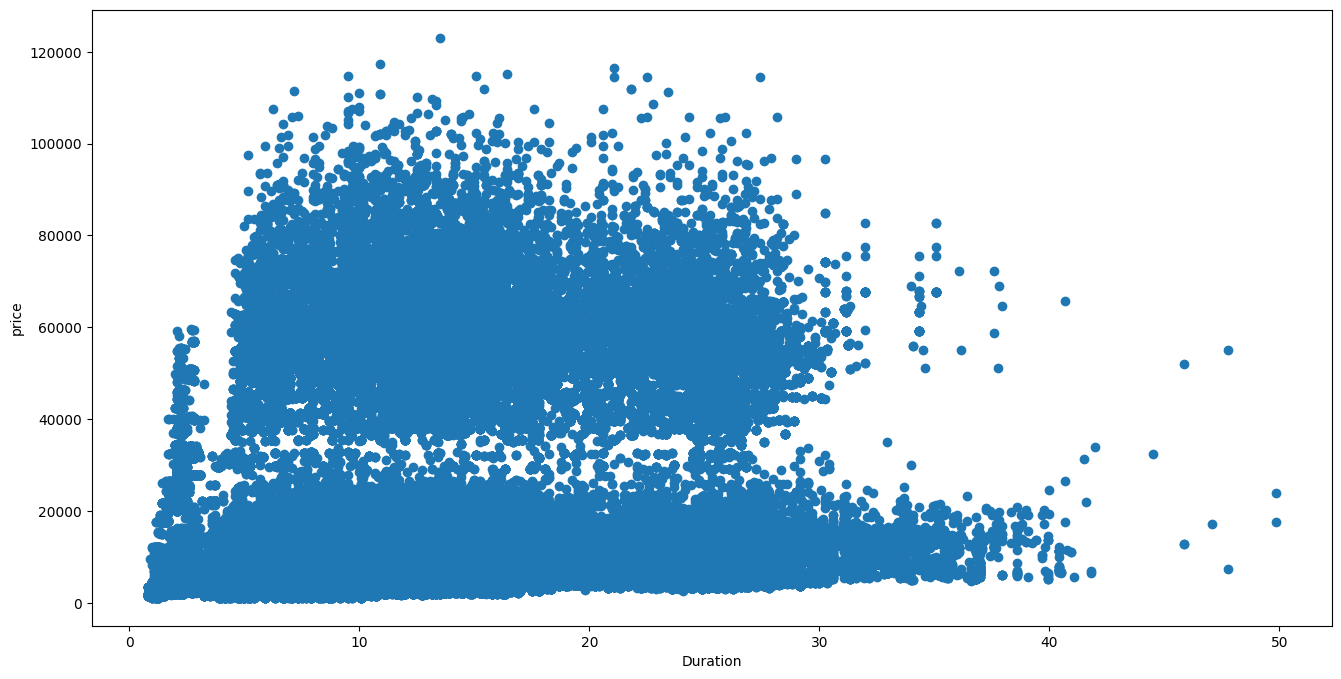

In [20]:
plt.figure(figsize=(16,8))

#price-duration 산점도
plt.scatter(y=df['price'], x=df['duration'])
plt.xlabel("Duration")
plt.ylabel('price')
plt.show()

In [21]:
df_eco = df[(df['class']=='Economy')]
df_eco= df_eco.select_dtypes(include=['int', 'float'])

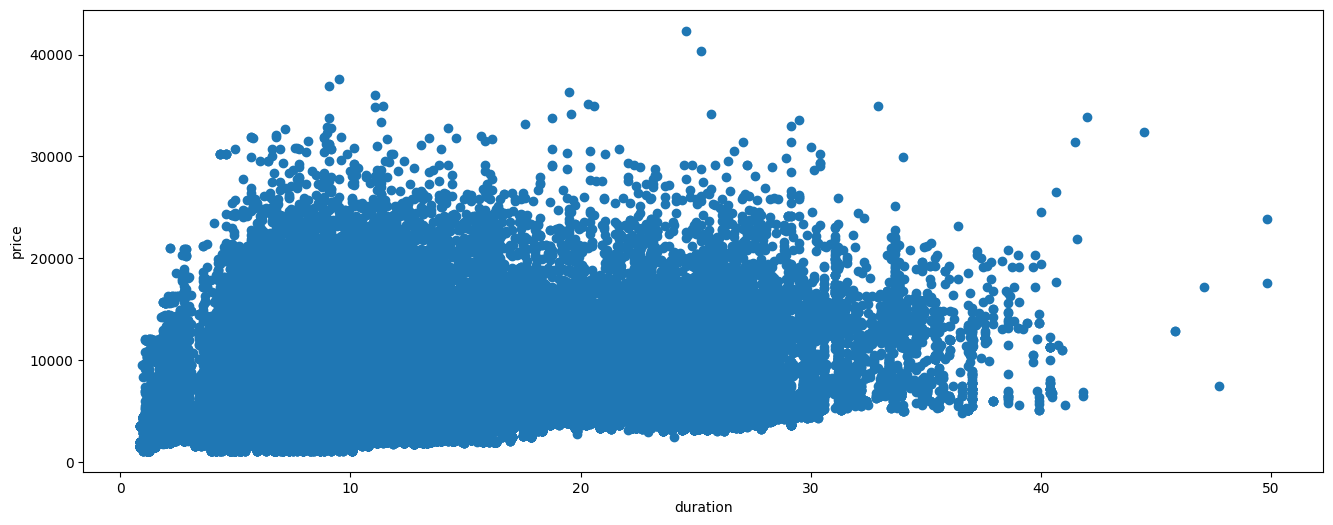

In [22]:
#좌석이 Economy 인 값에 대한 비행시간-항공권 가격 산점도
plt.figure(figsize=(16,6))
plt.scatter(y=df_eco["price"], x=df_eco["duration"])
plt.xlabel("duration")
plt.ylabel("price")
plt.show()

히트맵(heatmap)
- 데이터의 배열을 색상으로 표형해 주는 그래프
- 여러 카테고리 값의 변화를 한눈에 볼 수 있기 때문에 두 값 또는 각 칼럼 간의 상관관계를 나타낼 때 주로 사용
- 시각적인 요소를 잘 표현할 수 있는 seaborn 라이브러리를 권함

In [23]:
heat = df_eco.corr() #상관계수 데이터 만들기

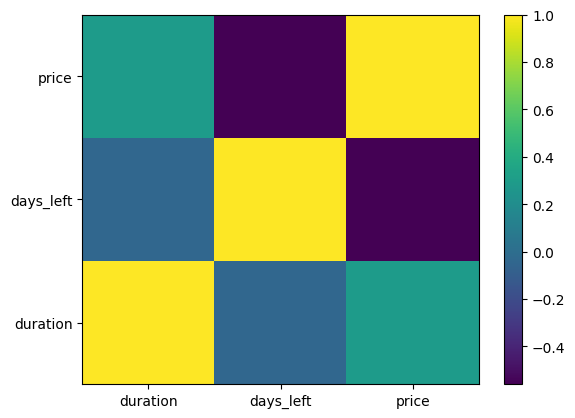

In [24]:
import numpy as np
plt.pcolor(heat) #heatmap 그리기

plt.xticks(np.arange(0.5, len(heat.columns),1), heat.columns) # x축 항목 정보
plt.yticks(np.arange(0.5, len(heat.index),1), heat.index) # y축 항목 정보
plt.colorbar() # 옆에 표시되는 바
plt.show()

범주형 산점도(categorical plot)
- 범주형 데이터와 수치형 데이터의 관계를 시각화할 수 있는 그래프
- row, col, hue 파라미터를 사용해서 더 많은 범주형 데이터의 관계를 확인
- row, col, hue 파라미터는 데이터의 하위 집합을 정의

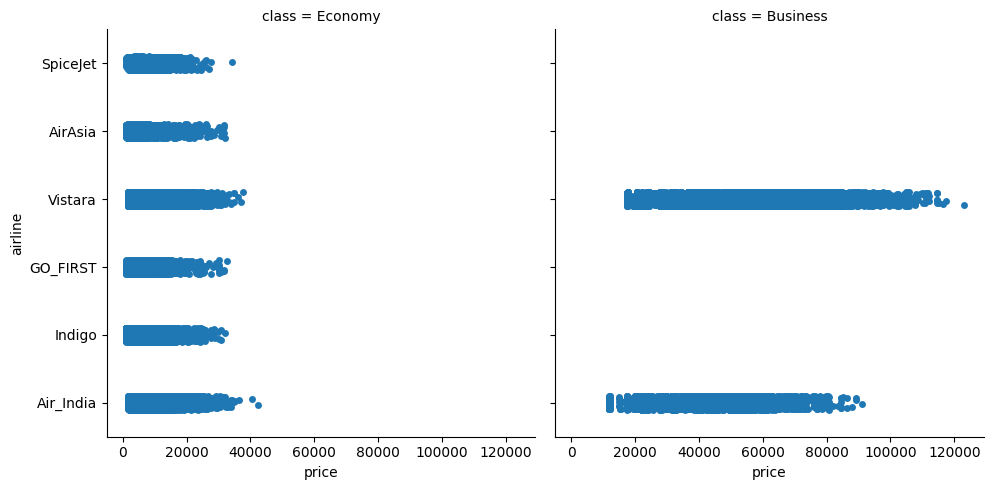

In [27]:
import seaborn as sns
sns.catplot(y='airline', x='price', col='class', data=df)

선형 회귀 모델 그래프(linear model plot)
- 선형 회귀 모델과 연관 있는 함수로 일반적인 산점도와 함께 직선의 회귀선을 그려주기 때문에 특성간의 선형적인 관계를 확인하기 쉬운 그래프

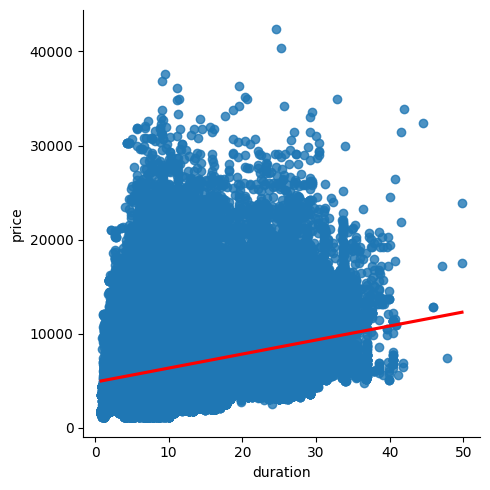

In [28]:
sns.lmplot(x='duration', y='price', data=df_eco, line_kws={'color':'red'})

빈도 그래프(count plot)
- 범주형 데이터에 대하여 항목별로 개수를 세어서 막대 그래프를 그림
- 각 카테고리 값별로 데이터가 얼마나 있는지 표시할 수 있으며, 해당 특성을 구성하고 있는 값(value)를 구분해서 보여줌

<Axes: xlabel='airline', ylabel='count'>

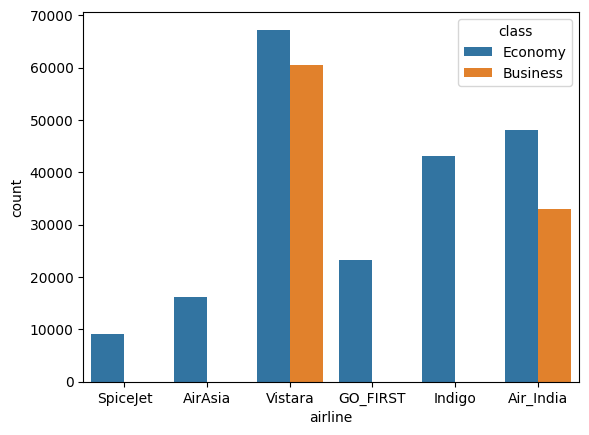

In [29]:
sns.countplot(x='airline', hue='class', data=df)

조인트 그래프(joint plot)
- 중앙의 산점도와 그래프 가장자리의 히스토그램을 동시에 그려주는 그래프
- 데이터의 분포와 상관관계를 한번에 볼 수 있지만 수치형 데이터만 표현할 수 있음

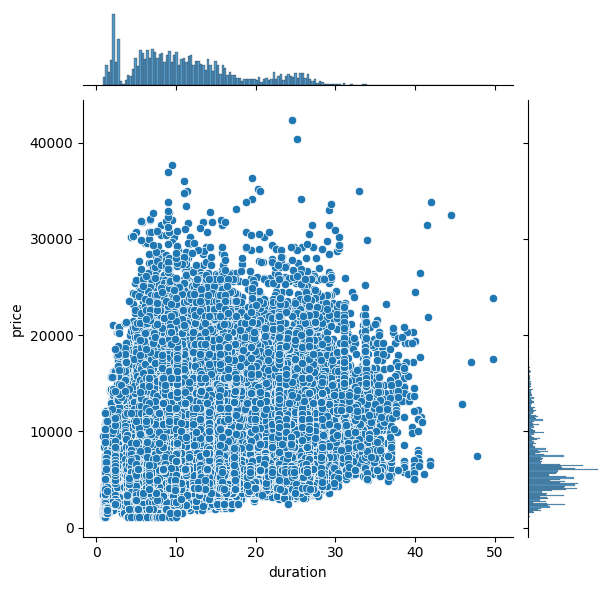

In [30]:
sns.jointplot(y='price', x='duration', data=df_eco)

히트맵(heatmap)
- seaborn에서는 다양한 색상 팔레트 지원, 칼러바 자동 생성

<Axes: >

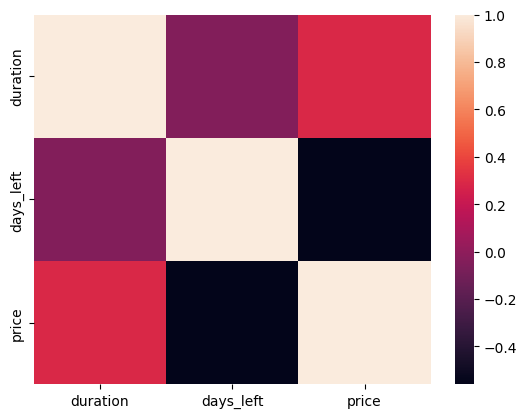

In [31]:
sns.heatmap(df_eco.corr())